# Implementation of stimulations and local manipulations from 'Investigating the impact of local manipulations on spontaneous and evoked brain complexity indices: A large-scale computational model' by Gaglioti G., Nieus T., Massimini M., & Sarasso S., (2024).

In [1]:
from tvb.simulator.lab import *
from func_TVB import *
import pandas as pd
import os
import pylab as plt
%matplotlib inline

We load the two connectomes used in the study.

In [2]:
path_base = os.getcwd()
path_Dconn = os.path.join(path_base, 'data', 'connectivity', 'Dconn.zip' )
Dconn = connectivity.Connectivity.from_file(path_Dconn)
Dconn.configure()

path_Hconn = os.path.join(path_base, 'data', 'connectivity', 'Hconn.zip' )
Hconn = connectivity.Connectivity.from_file(path_Hconn)
Hconn.configure()

WARNING  File 'hemispheres' not found in ZIP.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 435, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] Impossibile accedere al file. Il file è utilizzato da un altro processo: 'C:\\Users\\gagli\\TVB\\logs\\library.log' -> 'C:\\Users\\gagli\\TVB\\logs\\library.log.2024-01-07'
Call stack:
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\gagli\Desktop\TVB_Dis

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 435, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] Impossibile accedere al file. Il file è utilizzato da un altro processo: 'C:\\Users\\gagli\\TVB\\logs\\library.log' -> 'C:\\Users\\gagli\\TVB\\logs\\library.log.2024-01-07'
Call stack:
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\gagli\Desktop\TVB_Distribution(2)\tvb_data\Lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\gagli\Desktop\TVB_Dis

Each local manipulation was defined by first choosing a central node (center of the manipulation) to be silenced. Subsequently, the remaining nodes to be silenced were selected based on a geometrical distance criterion (Euclidean distance) from the central node. The function 'NearestNodes' performs this selection: it finds the k regions closest (in terms of Euclidean distances) to a given node (central_node).

In [3]:
L1 = NearestNodes(Dconn, 14, 0, 38, k=2)
L1

array([14, 16, 15], dtype=int64)

In [4]:
local_manipulations = np.array([[          ], # control condition
                                [14, 16, 15],
                                [17, 18, 27],
                                [30, 33, 31],
                                [36, 35,  5],
                                [ 6, 21,  2],
                                [ 3,  4,  5], # This is the only manipulation that doesn't follow a geometric selection criterion but involves three adjacent nodes of the cingulate cortex
                                [12, 28, 25],
                                [15, 14,  4],
                                [19, 3,  20],
                                [ 0,  1, 29],
                                [ 2, 24,  6],
                                [ 9, 24, 34],
                                [22, 20, 19],
                                [23,  8, 27],
                                [32,  2, 21],
                                [ 3, 19, 18],
                                [11, 33, 29],
                                [28, 12, 16],
                                [18, 3,  17],
                                [34, 24, 31]], dtype=object)

data_df = local_manipulations.copy()
data_df = np.zeros((21,3), dtype=object)
for r in range(data_df.shape[0]):
    data_df[r]=np.array([None,None,None]) if r==0 else np.array(local_manipulations[r])
    
df_cond = pd.DataFrame(data=data_df, columns=['manipulated node 1', 'manipulated node 2', 'manipulated node 3'])
df_cond.index = [f'L{n}' if n > 0 else 'control' for n in range(len(local_manipulations))]
for index, row in df_cond.iterrows():
    for col in df_cond.columns:
        if pd.notna(row[col]):
            df_cond.at[index, col] = Dconn.region_labels[df_cond.at[index, col]]
df_cond

,manipulated node 1,manipulated node 2,manipulated node 3
control,None,None,None
L1,rPCIP,rPCS,rPCM
L2,rPFCCL,rPFCDL,rPMCVL
L3,rTCC,rTCS,rTCI
L4,rV2,rV1,rCCR
L5,rCCS,rPFCORB,rAMYG
L6,rCCA,rCCP,rCCR
L7,rM1,rS1,rPMCDL
L8,rPCM,rPCIP,rCCP
L9,rPFCDM,rCCA,rPFCM


In our study, we individually stimulate a total of 12 nodes located in the right hemisphere, homogeneously sampling all cortical lobes. 

In [5]:
stimulated_nodes = np.array([11,13,14,16,17,18,21,22,26,29,30,36])

df_stim = pd.DataFrame(data=stimulated_nodes.copy(), columns=['stimulated node'])
df_stim.index = [f'S{n+1}' for n in range(len(stimulated_nodes))]
for index, row in df_stim.iterrows():
    for col in df_stim.columns:
        df_stim.at[index, col] = Dconn.region_labels[df_stim.at[index, col]]
df_stim

,stimulated node
S1,rIP
S2,rPCI
S3,rPCIP
S4,rPCS
S5,rPFCCL
S6,rPFCDL
S7,rPFCORB
S8,rPFCPOL
S9,rPMCM
S10,rS2


To avoid overlap between the stimulated and manipulated nodes, the latter are replaced with the closest non-manipulated nodes to the center of the manipulation.

In [6]:
Dconn_stim_manip_dict={}
for stim_node in stimulated_nodes:
    local_manip_list=[]
    for lm in local_manipulations:
        if len(lm)==0 or lm[0] is None:
            manipulated_nodes = lm # Keep the control condition unchanged 
        elif list(lm)==[3,4,5]: # This is the only manipulation that doesn't follow a geometric selection criterion but involves three nodes of the cingulate cortex
            manipulated_nodes = lm
        else:
            # Replace the manipulated node that is to be stimulated with the next closest one
            manipulated_nodes = NearestNodes(Dconn, lm[0], 0, 38, k=2)
            if stim_node in manipulated_nodes:
                manipulated_nodes = NearestNodes(Dconn, manipulated_nodes[0], 0, 38, k=3)
                manipulated_nodes = np.delete(manipulated_nodes, np.where(manipulated_nodes==stim_node))
                for lm in local_manipulations[1:]:
                    # Further check; if one of the modified manipulations was already present (in local_manipulations), it is further modified by taking the next closest node
                    if list(np.sort(lm))==list(np.sort(manipulated_nodes)):
                        toapp = NearestNodes(Dconn, manipulated_nodes[0], 0, 38, k=4)[-1]
                        manipulated_nodes = list(np.delete(manipulated_nodes, np.where(manipulated_nodes==manipulated_nodes[-1])))
                        manipulated_nodes.append(toapp)  
        local_manip_list.append(list(manipulated_nodes))
    Dconn_stim_manip_dict.update({stim_node:np.array(local_manip_list, dtype=object)})

In [7]:
path_stim_manip = os.path.join(path_base, 'data', 'stim_manip')
np.save(os.path.join(path_stim_manip, 'Dconn_stim_manip_dict'), Dconn_stim_manip_dict, allow_pickle=1)

Now, let's plot some conditions.

In [17]:
%pylab nbagg
%matplotlib inline


surf = surfaces.CorticalSurface.from_file()
vtx = surf.vertices
tri = surf.triangles

regmap = region_mapping.RegionMapping.from_file().array_data
isrh_reg = Dconn.is_right_hemisphere(range(Dconn.number_of_regions))
isrh_vtx = np.array([isrh_reg[r] for r in regmap])

reg_idxs = np.arange(0, Dconn.region_labels.shape[0])

'''
    The following code is taken from: https://github.com/JohnGriffiths/ScinetSS2020_BrainNetworkModelling/tree/master
'''

from nilearn.plotting import plot_surf_roi,plot_surf_stat_map,plot_surf

from nilearn.plotting import plot_surf_roi,plot_surf_stat_map,plot_surf
from matplotlib.tri import Triangulation

def plot_surface_mpl(vtx,tri,data=None,rm=None,reorient='tvb',view='superior',
                     shaded=False,ax=None,figsize=(6,4), title=None,
                     lthr=None,uthr=None, nz_thr = 1E-20,
                     shade_kwargs = {'edgecolors': 'k', 'linewidth': 0.1,
                                     'alpha': None, 'cmap': 'coolwarm',
                                     'vmin': None, 'vmax': None}):
                        
  r"""Plot surfaces, surface patterns, and region patterns with matplotlib
    
  This is a general-use function for neuroimaging surface-based data, and 
  does not necessarily require construction of or interaction with tvb 
  datatypes. 

  See also:  plot_surface_mpl_mv



  Parameters
  ----------
  
  vtx           : N vertices x 3 array of surface vertex xyz coordinates 

  tri           : N faces x 3 array of surface faces

  data          : array of numbers to colour surface with. Can be either 
                  a pattern across surface vertices (N vertices x 1 array),
                  or a pattern across the surface's region mapping 
                  (N regions x 1 array), in which case the region mapping 
                  bust also be given as an argument. 
                  
  rm            : region mapping - N vertices x 1 array with (up to) N 
                  regions unique values; each element specifies which 
                  region the corresponding surface vertex is mapped to 

  reorient      : modify the vertex coordinate frame and/or orientation 
                  so that the same default rotations can subsequently be 
                  used for image views. The standard coordinate frame is 
                  xyz; i.e. first,second,third axis = left-right, 
                  front-back, and up-down, respectively. The standard 
                  starting orientation is axial view; i.e. looking down on
                  the brain in the x-y plane.
                  
                  Options: 

                    tvb (default)   : swaps the first 2 axes and applies a rotation
                                              
                    fs              : for the standard freesurfer (RAS) orientation; 
                                      e.g. fsaverage lh.orig. 
                                      No transformations needed for this; so is 
                                      gives same result as reorient=None

  view          : specify viewing angle. 
  
                  This can be done in one of two ways: by specifying a string 
                  corresponding to a standard viewing angle, or by providing 
                  a tuple or list of tuples detailing exact rotations to apply 
                  around each axis. 
                  
                  Standard view options are:
    
                  lh_lat / lh_med / rh_lat / rh_med / 
                  superior / inferior / posterior / anterior

                  (Note: if the surface contains both hemispheres, then medial 
                   surfaces will not be visible, so e.g. 'rh_med' will look the 
                   same as 'lh_lat')
                   
                  Arbitrary rotations can be specied by a tuple or a list of 
                  tuples, each with two elements, the first defining the axis 
                  to rotate around [0,1,2], the second specifying the angle in 
                  degrees. When a list is given the rotations are applied 
                  sequentially in the order given. 
                  
                  Example: rotations = [(0,45),(1,-45)] applies 45 degrees 
                  rotation around the first axis, followed by 45 degrees rotate 
                  around the second axis. 

  lthr/uthr     : lower/upper thresholds - set to zero any datapoints below / 
                  above these values
  
  nz_thr        : near-zero threshold - set to zero all datapoints with absolute 
                  values smaller than this number. Default is a very small 
                  number (1E-20), which unless your data has very small numbers, 
                  will only mask out actual zeros. 

  shade_kwargs  : dictionary specifiying shading options

                  Most relevant options (see matplotlib 'tripcolor' for full details):
                  
                    - 'shading'        (either 'gourand' or omit; 
                                        default is 'flat')
                    - 'edgecolors'     'k' = black is probably best
                    - 'linewidth'      0.1 works well; note that the visual 
                                       effect of this will depend on both the 
                                       surface density and the figure size 
                    - 'cmap'           colormap
                    - 'vmin'/'vmax'    scale colormap to these values
                    - 'alpha'          surface opacity
                  
  ax            : figure axis
  
  figsize       : figure size (ignore if ax provided)
  
  title         : text string to place above figure
  
  
  
                  
  Usage
  -----
       

  Basic freesurfer example:

  import nibabel as nib
  vtx,tri = nib.freesurfer.read_geometry('subjects/fsaverage/surf/lh.orig')
  plot_surface_mpl(vtx,tri,view='lh_lat',reorient='fs')



  Basic tvb example:
  
  ctx = cortex.Cortex.from_file(source_file = ctx_file,
                                region_mapping_file =rm_file)
  vtx,tri,rm = ctx.vertices,ctx.triangles,ctx.region_mapping
  conn = connectivity.Connectivity.from_file(conn_file); conn.configure()
  isrh_reg = conn.is_right_hemisphere(range(conn.number_of_regions))
  isrh_vtx = np.array([isrh_reg[r] for r in rm])
  dat = conn.tract_lengths[:,5]

  plot_surface_mpl(vtx=vtx,tri=tri,rm=rm,data=dat,view='inferior',title='inferior')

  fig, ax = plt.subplots()
  plot_surface_mpl(vtx=vtx,tri=tri,rm=rm,data=dat, view=[(0,-90),(1,55)],ax=ax,
                   title='lh angle',shade_kwargs={'shading': 'gouraud', 'cmap': 'rainbow'})

   
  """
    
  # Copy things to make sure we don't modify things 
  # in the namespace inadvertently. 
    
  vtx,tri = vtx.copy(),tri.copy()
  if data is not None: data = data.copy()

  # 1. Set the viewing angle 
  
  if reorient == 'tvb':
    # The tvb default brain has coordinates in the order 
    # yxz for some reason. So first change that:   
    vtx = np.array([vtx[:,1],vtx[:,0],vtx[:,2]]).T.copy()
    
    # Also need to reflect in the x axis
    vtx[:,0]*=-1

  # (reorient == 'fs' is same as reorient=None; so not strictly needed
  #  but is included for clarity)
   


  # ...get rotations for standard view options
    
  if   view == 'lh_lat'    : rots =  [(0,-90),(1,90)  ]
  elif view == 'lh_med'    : rots =  [(0,-90),(1,-90) ] 
  elif view == 'rh_lat'    : rots =  [(0,-90),(1,-90) ]
  elif view == 'rh_med'    : rots =  [(0,-90),(1,90)  ]
  elif view == 'superior'  : rots =   None
  elif view == 'inferior'  : rots =   (1,180)
  elif view == 'anterior'  : rots =   (0,-90)
  elif view == 'posterior' : rots =  [(0, -90),(1,180)]
  elif (type(view) == tuple) or (type(view) == list): rots = view 

  # (rh_lat is the default 'view' argument because no rotations are 
  #  for that one; so if no view is specified when the function is called, 
  #  the 'rh_lat' option is chose here and the surface is shown 'as is' 
                            
                            
  # ...apply rotations                          
     
  if rots is None: rotmat = np.eye(3)
  else:            rotmat = get_combined_rotation_matrix(rots)
  vtx = np.dot(vtx,rotmat)

                                    
      
  # 2. Sort out the data
                                    
                                    
  # ...if no data is given, plot a vector of 1s. 
  #    if using region data, create corresponding surface vector 
  if data is None: 
    data = np.ones(vtx.shape[0]) 
  elif data.shape[0] != vtx.shape[0]: 
    data = np.array([data[r] for r in rm])
    
  # ...apply thresholds
  if uthr: data *= (data < uthr)
  if lthr: data *= (data > lthr)
  data *= (np.abs(data) > nz_thr)

                                    
  # 3. Create the surface triangulation object 
  
  x,y,z = vtx.T
  tx,ty,tz = vtx[tri].mean(axis=1).T
  tr = Triangulation(x,y,tri[np.argsort(tz)])
                
  # 4. Make the figure 

  if ax is None: fig, ax = plt.subplots(figsize=figsize, dpi=300, facecolor='white')  
  
  #if shade = 'gouraud': shade_opts['shade'] = 
  tc = ax.tripcolor(tr, np.squeeze(data), **shade_kwargs)
                        
  ax.set_aspect('equal')
  ax.axis('off')
    
  if title is not None: ax.set_title(title)






def plot_surface_mpl_mv(vtx=None,tri=None,data=None,rm=None,hemi=None,   # Option 1
                        vtx_lh=None,tri_lh=None,data_lh=None,rm_lh=None, # Option 2
                        vtx_rh=None,tri_rh=None,data_rh=None,rm_rh=None,
                        title=None,**kwargs):

  r"""Convenience wrapper on plot_surface_mpl for multiple views 
   
  This function calls plot_surface_mpl five times to give a complete 
  picture of a surface- or region-based spatial pattern. 

  As with plot_surface_mpl, this function is written so as to be 
  generally usable with neuroimaging surface-based data, and does not 
  require construction of of interaction with tvb datatype objects. 

  In order for the medial surfaces to be displayed properly, it is 
  necessary to separate the left and right hemispheres. This can be 
  done in one of two ways: 

  1. Provide single arrays for vertices, faces, data, and 
     region mappings, and addition provide arrays of indices for 
     each of these (vtx_inds,tr_inds,rm_inds) with 0/False 
     indicating left hemisphere vertices/faces/regions, and 1/True 
     indicating right hemisphere. 

     Note: this requires that 

  2. Provide separate vertices,faces,data,and region mappings for 
     each hemisphere (vtx_lh,tri_lh; vtx_rh,tri_rh,etc...)


 
  Parameters
  ----------

  (see also plot_surface_mpl parameters info for more details)

  (Option 1)

  vtx               :  surface vertices
 
  tri               : surface faces

  data              : spatial pattern to plot

  rm                : surface vertex to region mapping

  hemi              : hemisphere labels for each vertex
                      (1/True = right, 0/False = left) - 
      

  OR

  (Option 2)

  vtx_lh            : left hemisphere surface_vertices
  vtx_rh            : right ``      ``    ``     ``
  
  tri_lh            : left hemisphere surface faces 
  tri_rh            : right ``      ``    ``     ``

  data_lh          : left hemisphere surface_vertices
  data_rh          : right ``      ``    ``     ``

  rm_lh            : left hemisphere region_mapping
  rm_rh            : right ``      ``    ``     ``


  title            : title to show above middle plot
 
  kwargs           : additional tripcolor kwargs; see plot_surface_mpl

 

  Examples
  ----------

  # TVB default data

  # Plot one column of the region-based tract lengths 
  # connectivity matrix. The corresponding region is 
  # right auditory cortex ('rA1')

  ctx = cortex.Cortex.from_file(source_file = ctx_file,
                                region_mapping_file =rm_file)
  vtx,tri,rm = ctx.vertices,ctx.triangles,ctx.region_mapping
  conn = connectivity.Connectivity.from_file(conn_file); conn.configure()
  isrh_reg = conn.is_right_hemisphere(range(conn.number_of_regions))
  isrh_vtx = np.array([isrh_reg[r] for r in rm])
  dat = conn.tract_lengths[:,5]

  plot_surface_mpl_mv(vtx=vtx,tri=tri,rm=rm,data=dat,
                      hemi=isrh_vtx,title=u'rA1 \ntract length')

  plot_surface_mpl_mv(vtx=vtx,tri=tri,rm=rm,data=dat,
                    hemi=isrh_vtx,title=u'rA1 \ntract length',
                    shade_kwargs = {'shading': 'gouraud',
                                    'cmap': 'rainbow'}) 


  """
   

 
  if vtx is not None:                                    # Option 1
    tri_hemi = hemi[tri].any(axis=1)
    tri_lh,tri_rh = tri[tri_hemi==0],tri[tri_hemi==1]
  elif vtx_lh is not None:                               # Option 2
    vtx = np.vstack([vtx_lh,vtx_rh])
    tri = np.vstack([tri_lh,tri_rh+tri_lh.max()+1])

  if data_lh is not None:                                # Option 2
    data = np.hstack([data_lh,data_rh])
    
  if rm_lh is not None:                                  # Option 2 
    rm = np.hstack([rm_lh,rm_rh + rm_lh.max() + 1])
    
 

  # 2. Now do the plots for each view

  # (Note: for the single hemispheres we only need lh/rh arrays for the 
  #  faces (tri); the full vertices, region mapping, and data arrays
  #  can be given as arguments, they just won't be shown if they aren't 
  #  connected by the faces in tri )
  
  # LH lateral
  plot_surface_mpl(vtx,tri_lh,data=data,rm=rm,view='lh_lat',
                   ax=subplot(2,3,1),**kwargs)
    
  # LH medial
  plot_surface_mpl(vtx,tri_lh, data=data,rm=rm,view='lh_med',
                   ax=subplot(2,3,4),**kwargs)
    
  # RH lateral
  plot_surface_mpl(vtx,tri_rh, data=data,rm=rm,view='rh_lat',
                   ax=subplot(2,3,3),**kwargs)
    
  # RH medial
  plot_surface_mpl(vtx,tri_rh, data=data,rm=rm,view='rh_med',
                   ax=subplot(2,3,6),**kwargs)
    
  # Both superior
  plot_surface_mpl(vtx,tri, data=data,rm=rm,view='superior',
                   ax=subplot(1,3,2),title=title,**kwargs)
    
  plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0,
                      top=1.0, wspace=0, hspace=0) 




def get_rotation_matrix(rotation_axis, deg):
    
  '''Return rotation matrix in the x,y,or z plane'''
   
  
 
  # (note make deg minus to change from anticlockwise to clockwise rotation)
  th = -deg * (pi/180) # convert degrees to radians
    
  if rotation_axis == 0:
    return np.array( [[    1,         0,         0    ],
                      [    0,      cos(th),   -sin(th)],
                      [    0,      sin(th),    cos(th)]])
  elif rotation_axis ==1:
    return np.array( [[   cos(th),    0,        sin(th)],
                      [    0,         1,          0    ],
                      [  -sin(th),    0,        cos(th)]])
  elif rotation_axis ==2:
    return np.array([[   cos(th),  -sin(th),     0    ],
                     [    sin(th),   cos(th),     0   ],
                     [     0,         0,          1   ]])
    


def get_combined_rotation_matrix(rotations):
  '''Return a combined rotation matrix from a dictionary of rotations around 
     the x,y,or z axes'''
  rotmat = np.eye(3)
    
  if type(rotations) is tuple: rotations = [rotations] 
  for r in rotations:
    newrot = get_rotation_matrix(r[0],r[1])
    rotmat = np.dot(rotmat,newrot)
  return rotmat

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 110.0, 'stimulated node')

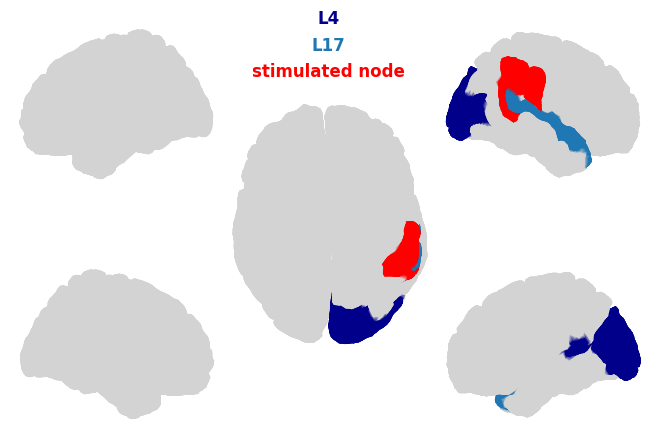

In [18]:
from matplotlib.colors import ListedColormap


surf = surfaces.CorticalSurface.from_file(os.path.join(path_base, 'data', 'connectivity','cortex_16384.zip'))
vtx = surf.vertices
tri = surf.triangles

regmap = region_mapping.RegionMapping.from_file().array_data
isrh_reg = Dconn.is_right_hemisphere(range(Dconn.number_of_regions))
isrh_vtx = np.array([isrh_reg[r] for r in regmap])

reg_idxs = np.arange(0, Dconn.region_labels.shape[0])

colors = ['red', 'darkblue', 'tab:blue',]
custom_cmap = ListedColormap(colors)
L4 = np.array(local_manipulations[4], dtype=int)
L17 = np.array(local_manipulations[17], dtype=int)

cmap1 = custom_cmap
cmap1.set_under(color='lightgrey')

data_Dconn = np.zeros(Dconn.weights.shape[0])
stim_node = stimulated_nodes[1]
data_Dconn[stim_node] = 1
data_Dconn[L4] = 2
data_Dconn[L17] = 3

plot_surface_mpl_mv(vtx=vtx,tri=tri,rm=regmap,data=data_Dconn,
                    hemi=isrh_vtx,
                    shade_kwargs = {'shading': 'gouraud',
                                'cmap': cmap1,
                                'edgecolors': 'k', 
                                'linewidth': 0, 
                                'vmin':1,'vmax':3})

plt.text(0, .15e3, 'L4', size=12, color='darkblue', weight='semibold', ha='center')
plt.text(0, .13e3, 'L17', size=12, color='tab:blue', weight='semibold', ha='center')
plt.text(0, .11e3, 'stimulated node', size=12, color='red', weight='semibold', ha='center')

We do the same in Hconn.

In [105]:
stim1 = NearestNodes(Hconn, np.array([268]), 0,500, k=13 )
HL1 = NearestNodes(Hconn, np.array([330]), 0,500, k=39 )
HL2 = NearestNodes(Hconn, np.array([149]), 0,500, k=39 )
HL3 = NearestNodes(Hconn, np.array([31]), 0,500, k=39 )
HL4 = NearestNodes(Hconn, np.array([441]), 0,500, k=39 )
HL5 = NearestNodes(Hconn, np.array([474]), 0,500, k=39 )
HL6 = NearestNodes(Hconn, np.array([249]), 0,500, k=39 )
HL7 = NearestNodes(Hconn, np.array([214]), 0,500, k=39 )
HL8 = NearestNodes(Hconn, np.array([299]), 0,500, k=39 )
HL9 = NearestNodes(Hconn, np.array([207]), 0,500, k=39 )
HL10 = NearestNodes(Hconn, np.array([377]), 0,500, k=39 )
HL11 = NearestNodes(Hconn, np.array([368]), 0,500, k=39 )
HL12 = NearestNodes(Hconn, np.array([10]), 0,500, k=39 )
HL13 = NearestNodes(Hconn, np.array([442]), 0,500, k=39 )
HL14 = NearestNodes(Hconn, np.array([413]), 0,500, k=39 )
HL15 = NearestNodes(Hconn, np.array([344]), 0,500, k=39 )
HL16 = NearestNodes(Hconn, np.array([48]), 0,500, k=39 )
HL17 = NearestNodes(Hconn, np.array([20]), 0,500, k=39 )
HL18 = NearestNodes(Hconn, np.array([45]), 0,500, k=39 )
HL19 = NearestNodes(Hconn, np.array([75]), 0,500, k=39 )
HL20 = NearestNodes(Hconn, np.array([280]), 0,500, k=39 )

H_local_manipulations = [[], HL1, HL2, HL3, HL4, HL5, HL6, HL7, HL8, HL9, HL10,
                         HL11, HL12, HL13, HL14, HL15, HL16, HL17, HL18, HL19, HL20]

In [145]:
Hconn_stim_manip_dict = dict(stim=stim1, manip=H_local_manipulations)

In [148]:
path_stim_manip = os.path.join(path_base, 'data', 'stim_manip')
np.save(os.path.join(path_stim_manip, 'Hconn_stim_manip_dict'), Hconn_stim_manip_dict, allow_pickle=1)

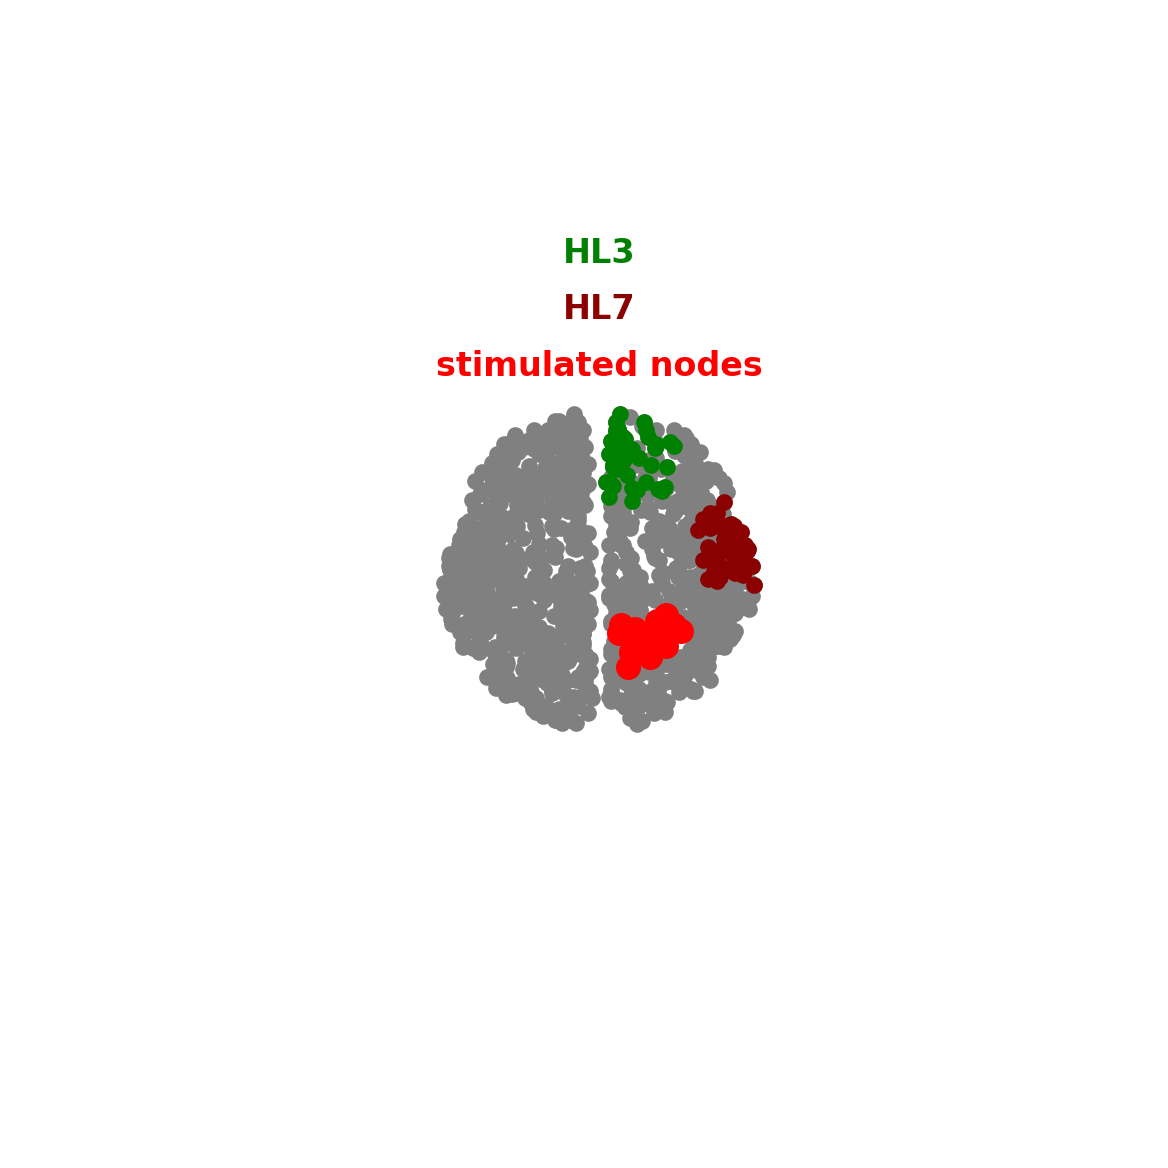

In [142]:
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
x = Hconn.centres[:,0]
y = Hconn.centres[:,1]
z = Hconn.centres[:,2]

ax.plot(x,y,z, 'o',color='gray', ms=3,zorder=6)
ax.plot(x[HL3],y[HL3],z[HL3], 'o', color='green', ms=3,zorder=6)
ax.plot(x[HL7],y[HL7],z[HL7], 'o', color='darkred', ms=3,zorder=6)
ax.plot(x[stim1],y[stim1],z[stim1], 'o', color='red', ms=5,zorder=6)

ax.text(x.mean(), y.max()+.8e2, z.mean(),  'HL3', size=8, color='green', weight='semibold', ha='center')
ax.text(x.mean(), y.max()+.5e2, z.mean(),  'HL7', size=8, color='darkred', weight='semibold', ha='center')
ax.text(x.mean(), y.max()+.2e2, z.mean(),  'stimulated nodes', size=8, color='red', weight='semibold', ha='center')

ax.set_xlabel(r'x', fontsize=7)
ax.set_ylabel('y', fontsize=7)
ax.set_zlabel('z', fontsize=7)
ax.xaxis.set_tick_params(labelsize=7)
ax.yaxis.set_tick_params(labelsize=7)
ax.zaxis.set_tick_params(labelsize=7)
ax.azim = 0
ax.dist = 20
ax.elev = 0

ax.azim = -90
ax.dist = 20
ax.elev = 90

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax.set_axis_off()

plt.show()